### Konlpy 사용하기
- 형태소 분석
- pos tagging

In [4]:
from konlpy.tag import Okt,Kkma

In [5]:
okt = Okt()
kkma = Kkma()

In [3]:
okt.morphs("아버지가 방에 들어가신다.")

['아버지', '가', '방', '에', '들어가신다', '.']

In [6]:
kkma.morphs("아버지가 방에 들어가신다.")

['아버지', '가', '방', '에', '들어가', '시', 'ㄴ다', '.']

In [7]:
okt.pos("아버지가 방에 들어가신다.")

[('아버지', 'Noun'),
 ('가', 'Josa'),
 ('방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb'),
 ('.', 'Punctuation')]

In [8]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [9]:
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

### Countvectorizer와 연결해서 사용하기

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
countVec = CountVectorizer()

In [12]:
text = ["나는 어제 밥을 먹었다.",
       "어제 영화는 너무 재미있었다.",
       "어제 먹었던 사과는 정말 맛없었다.",
       "내가 먹지 말라고 했지."]

In [13]:
countVec.fit(text)  #  토큰화 및 단어사전 구축

CountVectorizer()

In [15]:
countVec.vocabulary_  # 기본 띄어쓰기 단위로 토큰화

{'나는': 0,
 '어제': 10,
 '밥을': 8,
 '먹었다': 5,
 '영화는': 11,
 '너무': 2,
 '재미있었다': 12,
 '먹었던': 6,
 '사과는': 9,
 '정말': 13,
 '맛없었다': 4,
 '내가': 1,
 '먹지': 7,
 '말라고': 3,
 '했지': 14}

In [17]:
def myTokenizer(text):  # 나만의 토큰화 도구를 만들기
    return okt.nouns(text)  # 명사만 추출해서 토큰화하는 도구
                            # 필요에 따라서 pos를 활용해서 원하는 부분만 추출하도록 추가

In [18]:
countVecWithKonlpy = CountVectorizer(tokenizer=myTokenizer)

In [19]:
countVecWithKonlpy.fit(text)

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(tokenizer=<function myTokenizer at 0x000001E76F9EF8B0>)

In [20]:
countVecWithKonlpy.vocabulary_

{'나': 0, '어제': 5, '밥': 3, '영화': 6, '사과': 4, '정말': 7, '내': 1, '말': 2}

### 네이버 영화리뷰 데이터셋 감성분석

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_name = font_manager.FontProperties(fname='C:\Windows\Fonts\malgun.ttf').get_name()
rc('font',family=font_name)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [22]:
# 데이터 로딩 & 결측치 삭제

In [23]:
text_train  = pd.read_csv('data/ratings_train.txt', delimiter = '\t')   # delimiter - 데이터의 구분자를 설정
text_train

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [24]:
text_test  = pd.read_csv('data/ratings_test.txt', delimiter = '\t')   # delimiter - 데이터의 구분자를 설정
text_test

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [25]:
text_train.dropna(inplace = True)
text_test.dropna(inplace = True)

In [26]:
text_train.shape, text_test.shape

((149995, 3), (49997, 3))

In [27]:
# 문제와 정답 나누기
X_train = text_train['document']
y_train = text_train['label']
X_test = text_test['document']
y_test = text_test['label']

#### 감성분석 실습
1. pipeline 모델 구축(Countvectorizer, LogisticRegression)
2. 모델 학습 (train)
3. 모델 평가 (test)
4. 긍정 부정 리뷰에 영향을 많이 주는 한국어 단어를 시각화

In [28]:
from sklearn.pipeline import make_pipeline   # 여러가지 단계를 한번에 수행할 수 있도록 만들어줌
from sklearn.linear_model import LogisticRegression

In [31]:
pipe_model = make_pipeline(CountVectorizer(), LogisticRegression())  # 토큰화와 모델을 연속적으로 수행할 수 있게 만들어줌
pipe_model.fit(X_train, y_train) # 토큰화 + 수치화 -> 모델 학습

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregression', LogisticRegression())])

In [32]:
final_model = make_pipeline(CountVectorizer(max_df=15000, min_df=3, ngram_range=(1,3)),LogisticRegression(C=0.1))

In [33]:
final_model.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=15000, min_df=3, ngram_range=(1, 3))),
                ('logisticregression', LogisticRegression(C=0.1))])

In [34]:
final_model.score(X_test,y_test)

0.7988479308758526

In [35]:
final_model.steps

[('countvectorizer',
  CountVectorizer(max_df=15000, min_df=3, ngram_range=(1, 3))),
 ('logisticregression', LogisticRegression(C=0.1))]

In [37]:
final_cv = final_model.steps[0][1]
len(final_cv.vocabulary_)

65003

In [38]:
final_logi = final_model.steps[1][1]
word_weights = final_logi.coef_   # 선형모델의 가중치를 확인하는 키워드
word_weights

array([[ 0.09812422, -0.00621023,  0.22077935, ...,  0.10357639,
        -0.01378565,  0.15280408]])

In [39]:
word_weights.shape

(1, 65003)

In [40]:
# 단어를 인덱스 번호 기준으로 정렬
df = pd.DataFrame([final_cv.vocabulary_.keys(),
                  final_cv.vocabulary_.values()])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,64993,64994,64995,64996,64997,64998,64999,65000,65001,65002
0,더빙,진짜,짜증나네요,목소리,더빙 진짜,진짜 짜증나네요,포스터보고,가볍지,않구나,교도소,...,최고이고,감탄사를,연기와 연출,영화라는거다,상상력 그리고,영화 엔딩이,없는 존재의,존재의 가벼움,참을 없는 존재의,없는 존재의 가벼움
1,15097,55978,56670,21003,15099,56320,61039,2695,35784,6327,...,58131,3868,39634,41379,29129,40526,38130,53453,57210,38131


In [41]:
df = df.T  # 데이터프레임 가로 세로 전치

In [42]:
df_sorted = df.sort_values(by=1)  # 1번 열을 기준으로 정렬
df_sorted

,0,1
55200,00,0
45046,000,1
2825,007,2
19745,007 시리즈,3
30155,007 시리즈중,4
...,...,...
13167,힘있는,64998
43433,힘찬오빠,64999
53914,힙합,65000
42688,힙합에,65001


In [43]:
df_sorted['coef'] = word_weights.reshape(-1)  # 가중치를 1차원으로 변경후 컬럼에 추가
df_sorted

,0,1,coef
55200,00,0,0.098124
45046,000,1,-0.006210
2825,007,2,0.220779
19745,007 시리즈,3,0.014377
30155,007 시리즈중,4,0.069614
...,...,...,...
13167,힘있는,64998,0.049512
43433,힘찬오빠,64999,-0.158149
53914,힙합,65000,0.103576
42688,힙합에,65001,-0.013786


In [44]:
# coef 기준으로 정렬
df_sorted. sort_values(by="coef", inplace=True)
df_sorted

,0,1,coef
1657,최악의,58238,-2.582419
125,재미없다,50184,-2.350543
903,최악,58214,-2.301987
37,아깝다,33961,-2.268209
585,쓰레기,33630,-2.227048
...,...,...,...
516,재밌음,50869,1.981808
324,재미있어요,50418,2.013031
428,재밌어요,50782,2.091718
1776,최고다,57940,2.115025


In [45]:
# 시각화
top30_df = pd.concat([
    df_sorted.head(30), # 부정단어 30개
    df_sorted.tail(30) # 긍정단어 30개    
])

C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


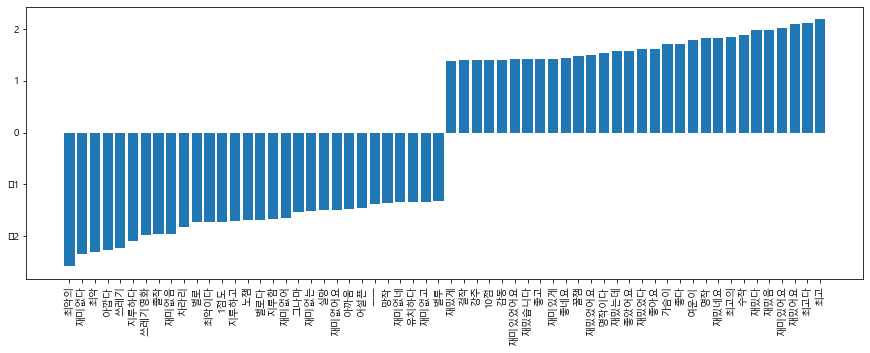

In [48]:
plt.figure(figsize=(15,5))  # 가로, 세로 비율
plt.bar(top30_df[0], top30_df['coef'])  # x축은 단어, y축은 가중치
plt.xticks(rotation = 90) # 축 눈금 각도 조절
plt.show()